## Random initial guesses

### Polynomial function test

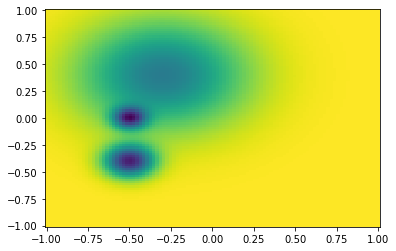

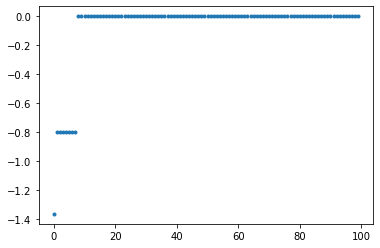

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from scipy.optimize import minimize


def double_well(x, a, w, c):
    if x.ndim == 1:
        x = x[:, None, None]
    dw = 0
    for i in range(len(a)):
        xi = x - c[i][:, None, None]
        ri = la.norm(xi, axis=0)
        dw -= a[i] * np.exp(- ri**2 / w[i] ** 2)
    return dw


p = ((1.2, 1, 0.8), (0.15, 0.1, 0.5),
     (np.array([-0.5, -0.4]), np.array([-0.5, 0]), np.array([-0.3, 0.4])))

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

plt.figure()
plt.pcolormesh(X, Y, double_well(np.array([X, Y]), *p))

N = 100
min = np.array([])
for i in range(N):
    x = np.random.uniform(-5, 5, size=2)
    res = minimize(double_well, x0=x, args=p)
    min = np.append(min, res.fun)
plt.figure()
plt.plot(np.sort(min), '.')


### Comparing lowest and highest final results

### 3 site

In [3]:
from Hubbard.equalizer import *
import numpy as np
import matplotlib.pyplot as plt

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardParamEqualizer(N,
                          R0=R0,
                          lattice=np.array([3], dtype=int),
                          band=1,
                          dim=1,
                          avg=1 / 2,
                          sparse=True,
                          equalize=False,
                          symmetry=True,
                          verbosity=0)
Ntime = 100
v0, bounds = G.init_guess()
v0_len = v0.shape[0]
c = np.zeros((Ntime, 1 + 2 * v0_len))
for i in range(Ntime):
    print(f'{i}-th attempt ===============================')
    __, __, __, info = G.equalzie('Uvt', random=True, callback=True)
    c[i, -1] = info['ctot'][-1]
    c[i, :v0_len] = info['x'][0]
    c[i, v0_len:-1] = info['x'][-1]


Initial trap depths: [0.90697551 0.90664189]
Initial waists:
[[0.98965881 1.        ]
 [0.95671217 1.        ]]
Initial trap centers:
[[-0.91840063  0.        ]
 [ 0.          0.        ]]
i=50	c=[2.35337982e-02 9.19262197e-15 2.34415321e-04]	c_i=0.023768213486170867	c_i//2-c_i=0.0006171266523614487
i=100	c=[1.86846640e-04 2.40839875e-14 1.88155274e-03]	c_i=0.0020683993746890197	c_i//2-c_i=0.021699817051687907
i=150	c=[1.32734579e-04 1.49839000e-14 1.78778859e-03]	c_i=0.0019205231674484676	c_i//2-c_i=0.015909355221181847
i=200	c=[3.98298601e-04 4.97689197e-14 4.34543100e-05]	c_i=0.00044175291105437144	c_i//2-c_i=0.001626645400675523
i=250	c=[3.61510441e-04 3.92446429e-14 7.89930124e-04]	c_i=0.001151440564200391	c_i//2-c_i=0.003958138368835811
i=300	c=[1.32904465e-04 1.81015156e-14 1.66919096e-06]	c_i=0.00013457365608733076	c_i//2-c_i=0.0015720687377179837
i=350	c=[3.89045318e-05 3.96685414e-14 7.15904846e-06]	c_i=4.606358030699225e-05	c_i//2-c_i=0.0012857569081126782
i=400	c=[2.8772783

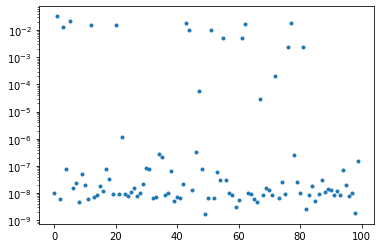

In [6]:
plt.plot(c[:, -1], '.')
plt.yscale('log')
plt.title('cost function values in 100 random guesses')

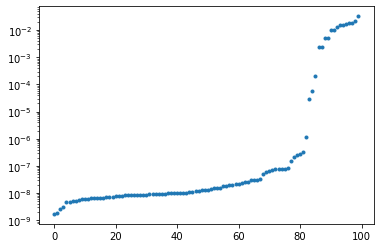

In [7]:
cs = np.sort(c[:, -1], axis=0)
plt.plot(cs, '.')
plt.yscale('log')
plt.title('sorted cost function in 100 random guesses')

0.005539019907814246


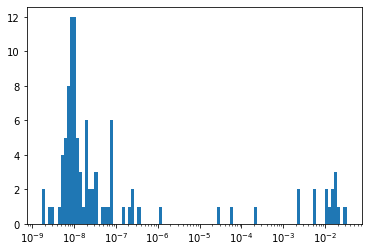

In [8]:
bins = np.geomspace(cs.min(), cs.max(), 100)
plt.hist(cs, bins=bins)
print(np.std(cs))
plt.xscale('log')
plt.title('cost function histograms in 100 random guesses')

In [ ]:
cidx = np.argmin(c[:, -1])
print('x0 =', c[cidx, :v0_len])
print('x =', c[cidx, v0_len:-1])
print('f =', c[cidx, -1])


x0 = [ 0.93806088  0.92822857  0.99867663  1.          0.96241108  1.
 -0.9144365   0.          0.          0.        ]
x = [ 0.95756265  0.9497517   1.02245729  1.          0.9063588   1.
 -1.0389969   0.          0.          0.        ]
f = 1.5755163593193237e-09


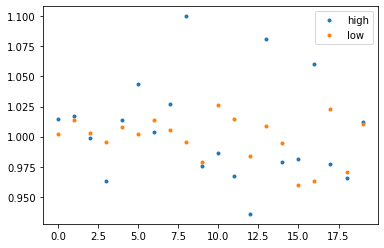

In [39]:
N = 20
chigh = np.argsort(c[:, -1])[-N:]
clow = np.argsort(c[:, -1])[:N]
idx = np.array(list(range(0, 3)) + [4, 6], dtype=int)
chchart = c[chigh][:, list(idx) + list(idx + v0_len) + [-1]]
clchart = c[clow][:, list(idx) + list(idx + v0_len) + [-1]]

plt.plot((chchart[:, 5]), '.', label='high')
plt.plot((clchart[:, 5]), '.', label='low')
plt.legend()
plt.title('$V_1$ in highest and lowest cost')


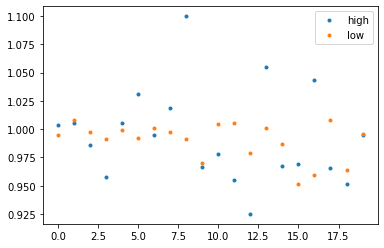

In [40]:
plt.plot((chchart[:, 6]), '.', label='high')
plt.plot((clchart[:, 6]), '.', label='low')
plt.legend()
plt.title('$V_2$ in highest and lowest cost')

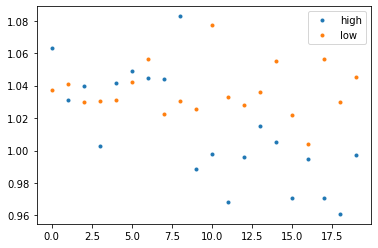

In [41]:
plt.plot((chchart[:, 7]), '.', label='high')
plt.plot((clchart[:, 7]), '.', label='low')
plt.legend()
plt.title('$w_1$ in highest and lowest cost')

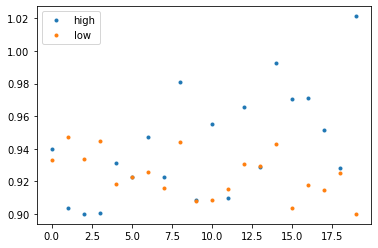

In [42]:
plt.plot((chchart[:, 8]), '.', label='high')
plt.plot((clchart[:, 8]), '.', label='low')
plt.legend()
plt.title('$w_2$ in highest and lowest cost')

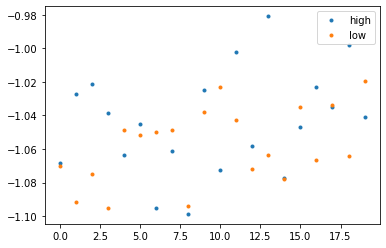

In [43]:
plt.plot((chchart[:, 9]), '.', label='high')
plt.plot((clchart[:, 9]), '.', label='low')
plt.legend()
plt.title('$x_1$ in highest and lowest cost')

In [ ]:
plt.plot((chchart[:, 10]), '.', label='high')
plt.plot((clchart[:, 10]), '.', label='low')
plt.legend()
plt.title('$x_1$ in highest and lowest cost')
plt.title('cost funcs in highest and lowest cost')

It seems that high results are scattered more at waist $w_1 < 1$ and $w_{2h} > w_{2l}$. 

In [28]:
for i in chigh:
    print('x_high =', c[i, v0_len:-1][list(range(0, 3)) + [4, 6]])

print('\n')
for i in clow:
    print('x_low =', c[i, v0_len:-1][list(range(0, 3)) + [4, 6]])
    # print('f =', c[i, -1])


x_high = [ 1.01465816  1.00410392  1.06300688  0.94003178 -1.06801995]
x_high = [ 1.01687804  1.00519661  1.03138946  0.90389461 -1.02710634]
x_high = [ 0.99908374  0.98562568  1.03946871  0.90001727 -1.02151026]
x_high = [ 0.96330418  0.9575322   1.0030028   0.90078968 -1.03832606]
x_high = [ 1.01415714  1.00585994  1.04186082  0.9311958  -1.06355645]
x_high = [ 1.04334363  1.0310611   1.04871019  0.9228518  -1.04516506]
x_high = [ 1.00378642  0.9946065   1.04465827  0.94746261 -1.09527313]
x_high = [ 1.02678919  1.01895071  1.04377143  0.92259984 -1.06093556]
x_high = [ 1.1         1.09987751  1.08272904  0.98088639 -1.098633  ]
x_high = [ 0.97531228  0.96657608  0.9887029   0.90829362 -1.0246248 ]
x_high = [ 0.98629741  0.97835568  0.99796097  0.95545419 -1.07274568]
x_high = [ 0.96721874  0.95542719  0.96856754  0.90969127 -1.00239435]
x_high = [ 0.93578897  0.92509149  0.99594093  0.96584481 -1.05793506]
x_high = [ 1.08105256  1.05481713  1.01489515  0.9290139  -0.98090692]
x_high

In [ ]:
import numpy as np
from Hubbard.plot import *
import matplotlib.pyplot as plt

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v, fix_u, fix_t, fix_v = G.str_to_flags('UTv')

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks,  txTarget, tyTarget = G.xy_links(nnt)
    if not fix_t:
        txTarget, tyTarget = None, None
else:
    nnt, xlinks, ylinks, txTarget, tyTarget = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget,  txTarget, tyTarget), (u, t, v), unitary=x0)

    return c


offset = np.array([0.91794318,  0.93745579, -0.98793246,
                  0.,          0.04479769, 0.])
cost_func(offset, None)

print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


V = [-40.52829778 -40.52832592 -40.52829778]
t = [0.23163589 0.23163589]
U = [2.06138451 2.06138353 2.06138451]
V_err = 3.273500357574625e-07
t_err = 1.0664350335676979e-14
U_err = 2.2382529234108543e-07


### 4 site

In [49]:
from Hubbard.equalizer import *
import numpy as np
import matplotlib.pyplot as plt

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardParamEqualizer(N,
                          R0=R0,
                          lattice=np.array([4], dtype=int),
                          band=1,
                          dim=1,
                          avg=1 / 2,
                          sparse=True,
                          equalize=False,
                          symmetry=True,
                          verbosity=0)
Ntime = 100
v0, bounds = G.init_guess()
v0_len = v0.shape[0]
c = np.zeros((Ntime, 1 + 2 * v0_len))
for i in range(Ntime):
    print(f'{i}-th attempt ===============================')
    __, __, __, info = G.equalzie('Uvt', random=True, callback=True)
    c[i, -1] = info['ctot'][-1]
    c[i, :v0_len] = info['x'][0]
    c[i, v0_len:-1] = info['x'][-1]


Initial trap depths: [1.04558452 1.06505167]
Initial waists:
[[0.99889609 1.        ]
 [0.95414044 1.        ]]
Initial trap centers:
[[-1.50398773  0.        ]
 [-0.40336588  0.        ]]
i=50	c=[0.09340888 1.28452223 0.0767427 ]	c_i=1.4546738071034462	c_i//2-c_i=-0.5598432475582992
i=100	c=[0.07794087 0.3960061  0.03724255]	c_i=0.5111895178569918	c_i//2-c_i=0.9434842935939449
i=150	c=[6.95188955e-02 2.82690310e-05 3.41545080e-02]	c_i=0.1037016725731622	c_i//2-c_i=0.6052820992975915
i=200	c=[0.01312239 0.00500025 0.00949228]	c_i=0.02761491076983385	c_i//2-c_i=0.4835745973175795
i=250	c=[1.53727170e-02 6.90409958e-05 4.02326209e-03]	c_i=0.019465020106465815	c_i//2-c_i=0.0865078313559921
i=300	c=[0.01611634 0.00037031 0.00020258]	c_i=0.01668923439321447	c_i//2-c_i=0.08701241429508336
i=350	c=[0.01601    0.00073197 0.00229294]	c_i=0.01903490413176158	c_i//2-c_i=0.07023053771399695
i=400	c=[1.60941114e-02 3.43010896e-04 2.79900900e-09]	c_i=0.016437125057143544	c_i//2-c_i=0.011177833979842

Text(0.5, 1.0, 'cost function values in 100 random guesses')

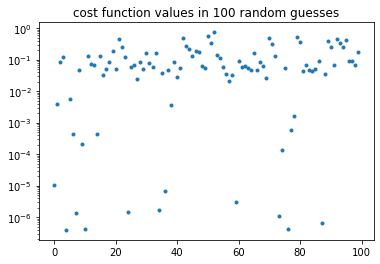

In [50]:
plt.plot(c[:, -1], '.')
plt.yscale('log')
plt.title('cost function values in 100 random guesses')

Text(0.5, 1.0, 'sorted cost function in 100 random guesses')

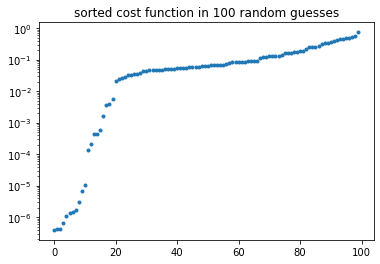

In [53]:
cs = np.sort(c[:, -1], axis=0)
plt.plot(cs, '.')
plt.yscale('log')
plt.title('sorted cost function in 100 random guesses')

0.146390093474499


Text(0.5, 1.0, 'cost function histograms in 100 random guesses')

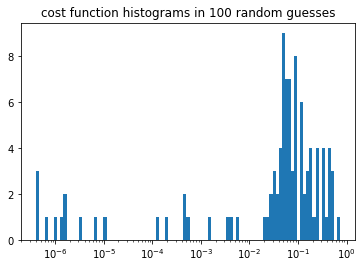

In [54]:
bins = np.geomspace(cs.min(), cs.max(), 100)
plt.hist(cs, bins=bins)
print(np.std(cs))
plt.xscale('log')
plt.title('cost function histograms in 100 random guesses')

Text(0.5, 1.0, '$V_1$ in highest and lowest cost')

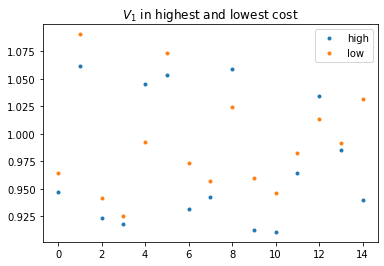

In [131]:
N = 15
ct = c[c[:, -1] < 0.2, :]
chigh = np.argsort(ct[:, -1])[-N:]
clow = np.argsort(ct[:, -1])[:N]
idx = np.array(list(range(0, 3)) + [4, 6, 8], dtype=int)
chchart = ct[chigh][:, list(idx) + list(idx + v0_len) + [-1]]
clchart = ct[clow][:, list(idx) + list(idx + v0_len) + [-1]]

plt.plot((chchart[:, 6]), '.', label='high')
plt.plot((clchart[:, 6]), '.', label='low')
plt.legend()
plt.title('$V_1$ in highest and lowest cost')


Text(0.5, 1.0, '$V_2$ in highest and lowest cost')

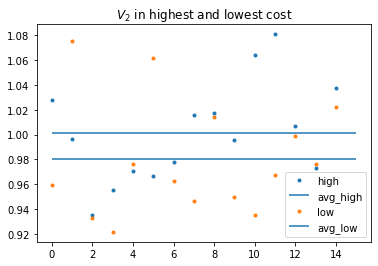

In [130]:
plt.plot((chchart[:, 7]), '.', label='high')
plt.hlines(np.mean(chchart[:, 7]), 0, N, label='avg_high')
plt.plot((clchart[:, 7]), '.', label='low')
plt.hlines(np.mean(clchart[:, 7]), 0, N, label='avg_low')
plt.legend()
plt.title('$V_2$ in highest and lowest cost')

Text(0.5, 1.0, '$w_1$ in highest and lowest cost')

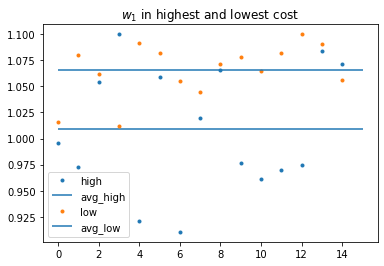

In [132]:
plt.plot((chchart[:, 8]), '.', label='high')
plt.hlines(np.mean(chchart[:, 8]), 0, N, label='avg_high')
plt.plot((clchart[:, 8]), '.', label='low')
plt.hlines(np.mean(clchart[:, 8]), 0, N, label='avg_low')
plt.legend()
plt.title('$w_1$ in highest and lowest cost')

Text(0.5, 1.0, '$w_2$ in highest and lowest cost')

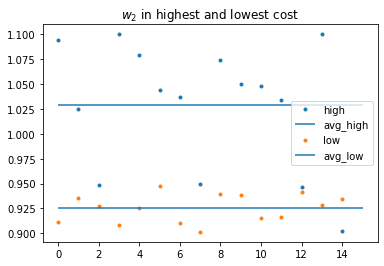

In [133]:
plt.plot((chchart[:, 9]), '.', label='high')
plt.hlines(np.mean(chchart[:, 9]), 0, N, label='avg_high')
plt.plot((clchart[:, 9]), '.', label='low')
plt.hlines(np.mean(clchart[:, 9]), 0, N, label='avg_low')
plt.legend()
plt.title('$w_2$ in highest and lowest cost')

Text(0.5, 1.0, '$x_1$ in highest and lowest cost')

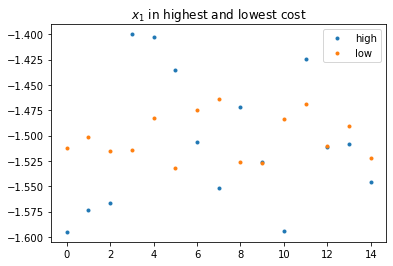

In [134]:
plt.plot((chchart[:, 10]), '.', label='high')
plt.plot((clchart[:, 10]), '.', label='low')
plt.legend()
plt.title('$x_1$ in highest and lowest cost')

Text(0.5, 1.0, '$x_2$ in highest and lowest cost')

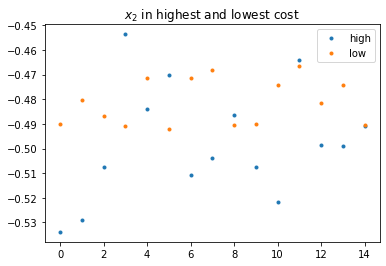

In [135]:
plt.plot((chchart[:, 11]), '.', label='high')
plt.plot((clchart[:, 11]), '.', label='low')
plt.legend()
plt.title('$x_2$ in highest and lowest cost')

Text(0.5, 1.0, 'cost funcs in highest and lowest cost')

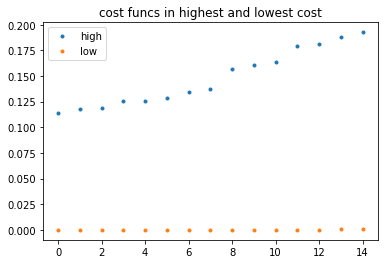

In [136]:
plt.plot((chchart[:, 12]), '.', label='high')
plt.plot((clchart[:, 12]), '.', label='low')
plt.legend()
plt.title('cost funcs in highest and lowest cost')

It seems also low results have much smaller $w_2$ in contrast to high ones.

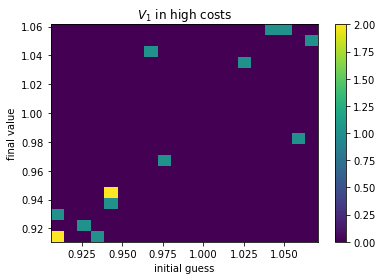

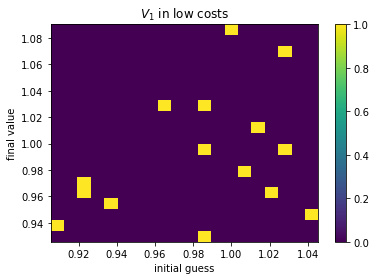

In [137]:
# plt.title('$V_1$ in highest and lowest cost')
plt.figure()
plt.title('$V_1$ in high costs')
plt.hist2d(chchart[:, 0], chchart[:, 6], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()
plt.figure()
plt.title('$V_1$ in low costs')
plt.hist2d(clchart[:, 0], clchart[:, 6], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()

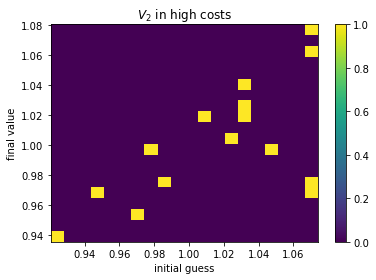

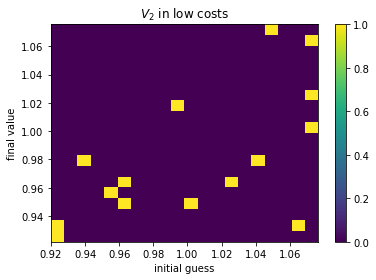

In [138]:
plt.figure()
plt.title('$V_2$ in high costs')
plt.hist2d(chchart[:, 1], chchart[:, 7], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()
plt.figure()
plt.title('$V_2$ in low costs')
plt.hist2d(clchart[:, 1], clchart[:, 7], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()

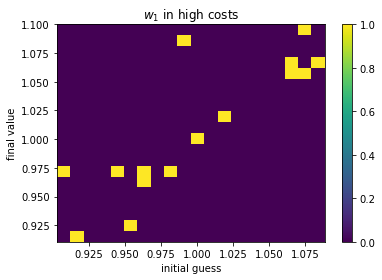

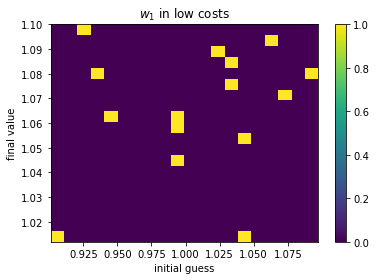

In [139]:
plt.figure()
plt.title('$w_1$ in high costs')
plt.hist2d(chchart[:, 2], chchart[:, 8], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()
plt.figure()
plt.title('$w_1$ in low costs')
plt.hist2d(clchart[:, 2], clchart[:, 8], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()

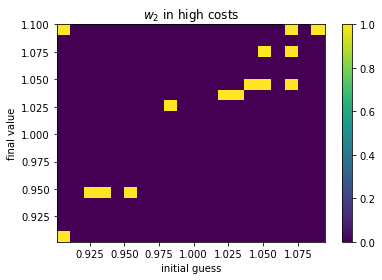

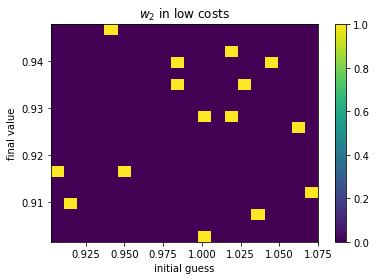

In [140]:
plt.figure()
plt.title('$w_2$ in high costs')
plt.hist2d(chchart[:, 3], chchart[:, 9], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()
plt.figure()
plt.title('$w_2$ in low costs')
plt.hist2d(clchart[:, 3], clchart[:, 9], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()

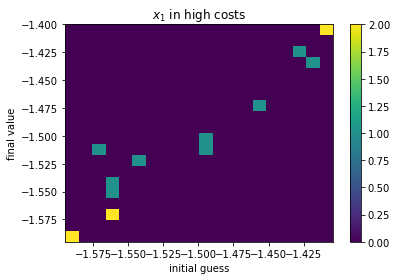

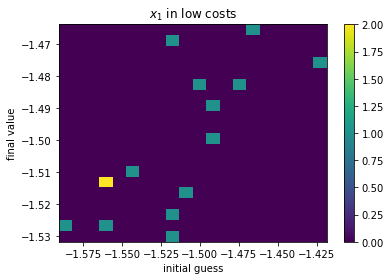

In [142]:
plt.figure()
plt.title('$x_1$ in high costs')
plt.hist2d(chchart[:, 4], chchart[:, 10], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()
plt.figure()
plt.title('$x_1$ in low costs')
plt.hist2d(clchart[:, 4], clchart[:, 10], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()

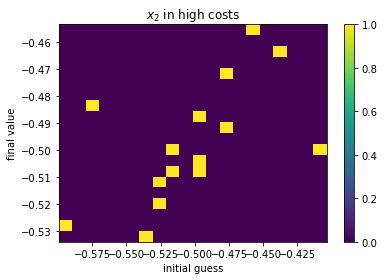

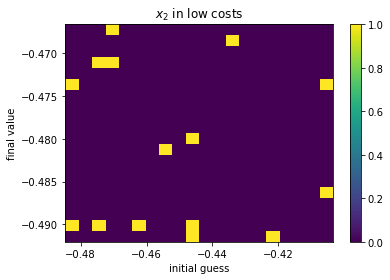

In [141]:
plt.figure()
plt.title('$x_2$ in high costs')
plt.hist2d(chchart[:, 5], chchart[:, 11], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()
plt.figure()
plt.title('$x_2$ in low costs')
plt.hist2d(clchart[:, 5], clchart[:, 11], bins=20)
plt.xlabel('initial guess')
plt.ylabel('final value')
plt.colorbar()

The correlation of higher values are more correlated. Maybe the program stops early as the cost function is too flat?

In [25]:
for i in chigh:
    print('x_high =', c[i, v0_len:-1][list(range(0, 3)) + [4, 6]])

print('\n')
for i in clow:
    print('x_low =', c[i, v0_len:-1][list(range(0, 3)) + [4, 6]])
    # print('f =', c[i, -1])

x_high = [ 0.9        1.0985997  1.1        1.1       -1.4      ]
x_high = [ 1.08134762  1.07229831  1.09247326  0.9814442  -1.6       ]
x_high = [ 0.9996672   0.99195569  1.02773266  0.9100534  -1.49096903]
x_high = [ 1.05021275  1.06933963  1.02001291  0.9250243  -1.45601635]
x_high = [ 0.96129892  0.99768563  0.99307287  0.96284759 -1.55126019]
x_high = [ 0.9         1.06395434  1.1         1.1        -1.4       ]
x_high = [ 1.05513106  1.02028485  1.09999997  1.07386101 -1.46437773]
x_high = [ 1.02597143  1.0168883   1.04691738  0.92357006 -1.50462742]
x_high = [ 0.97296083  1.06359124  1.01005026  1.0999927  -1.48651391]
x_high = [ 0.98253039  0.99675302  0.94940068  1.05518812 -1.55448302]
x_high = [ 0.90445869  0.90065889  1.06173033  0.95812715 -1.5974256 ]
x_high = [ 1.07929356  1.072284    1.02253081  0.99518474 -1.47161054]
x_high = [ 1.00985496  0.99726661  1.05388682  0.97171302 -1.54206423]
x_high = [ 1.0530932   0.93674442  0.96800195  0.9669399  -1.48527692]
x_high = [ 

### Smaller gradient tolarence for `minimize` function?

In [1]:
from Hubbard.equalizer import *
import numpy as np
import matplotlib.pyplot as plt

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardParamEqualizer(N,
                          R0=R0,
                          lattice=np.array([4], dtype=int),
                          band=1,
                          dim=1,
                          avg=1 / 2,
                          sparse=True,
                          equalize=False,
                          symmetry=True,
                          verbosity=0)
Ntime = 100
v0, bounds = G.init_guess()
v0_len = v0.shape[0]
c = np.zeros((Ntime, 1 + 2 * v0_len))
for i in range(Ntime):
    print(f'\n{i}-th attempt ===============================')
    __, __, __, info = G.equalzie('uvt', random=True, callback=True)
    c[i, -1] = info['ctot'][-1]
    c[i, :v0_len] = info['x'][0]
    c[i, v0_len:-1] = info['x'][-1]



0-th attempt ===============================
Initial trap depths: [1.05798392 1.02433366]
Initial waists:
[[0.92637392 1.        ]
 [0.99156594 1.        ]]
Initial trap centers:
[[-1.51901877  0.        ]
 [-0.4069014   0.        ]]
i=50	c=[0.01377366 0.68616886 0.00180075]	c_i=0.70174326512896	c_i//2-c_i=0.011900573058726938
i=100	c=[0.00310665 0.05001027 0.04547976]	c_i=0.09859666937860277	c_i//2-c_i=0.6031465895036203
i=150	c=[0.00054068 0.04952609 0.04493009]	c_i=0.09499686379137343	c_i//2-c_i=0.027440021492403904
i=200	c=[0.00100956 0.04857137 0.04165982]	c_i=0.09124074373839644	c_i//2-c_i=0.007355713530133562
i=250	c=[0.00096399 0.04866743 0.04237126]	c_i=0.09200268467671593	c_i//2-c_i=0.0036010445512195677
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.09084891220086225
            Iterations: 35
            Function evaluations: 296
            Gradient evaluations: 35

1-th attempt ===============================
Initial trap dept

Text(0.5, 1.0, 'sorted cost function in 100 random guesses')

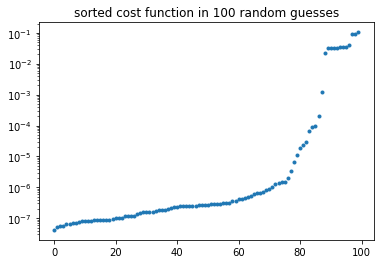

In [2]:
cs = np.sort(c[:, -1], axis=0)
plt.plot(cs, '.')
plt.yscale('log')
plt.title('sorted cost function in 100 random guesses')